In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from os import path
path= "/content/drive/MyDrive/MachineLearningPraktikum/Praktikum4/data"

In [4]:
df = pd.read_csv(path + "/calonpembelimobil.csv")
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [8]:
pd.read_csv(path + "/calonpembelimobil.csv")

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [10]:
X = df[['Usia', 'Penghasilan']]
y = df['Beli_Mobil']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['Usia', 'Penghasilan'])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 57   7]
 [  4 132]]


In [21]:
from sklearn.metrics import classification_report

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.95      0.97      0.96       136

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1799720798.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j]['Usia'], X_set[y_set == j]['Penghasilan'],


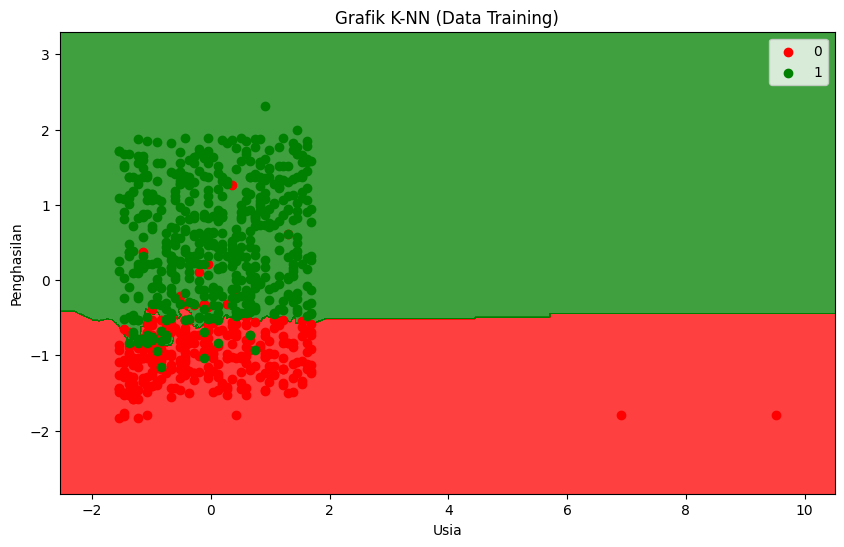

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

plt.figure(figsize=(10, 6))

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set['Usia'].min() - 1, stop=X_set['Usia'].max() + 1, step=0.01),
                     np.arange(start=X_set['Penghasilan'].min() - 1, stop=X_set['Penghasilan'].max() + 1, step=0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j]['Usia'], X_set[y_set == j]['Penghasilan'],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Grafik K-NN (Data Training)')
plt.xlabel('Usia')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-970476931.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j]['Usia'], X_set[y_set == j]['Penghasilan'],


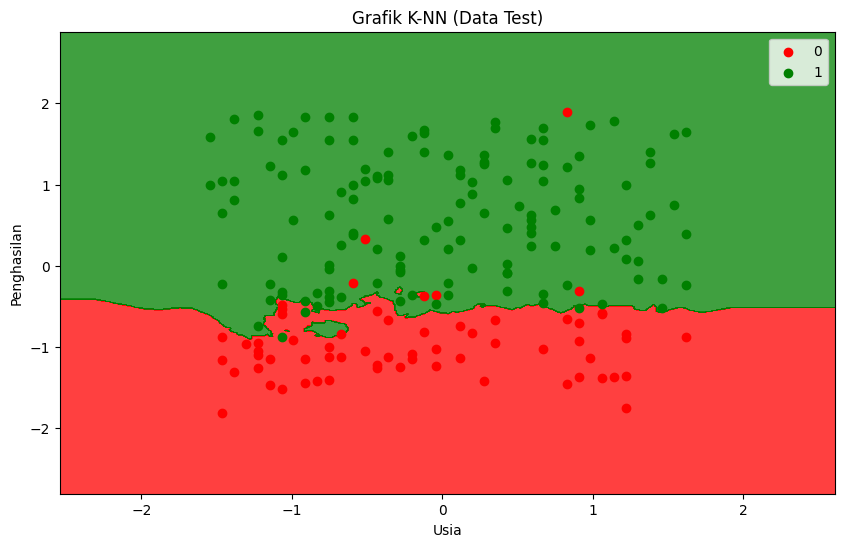

In [25]:
plt.figure(figsize=(10, 6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set['Usia'].min() - 1, stop=X_set['Usia'].max() + 1, step=0.01),
                     np.arange(start=X_set['Penghasilan'].min() - 1, stop=X_set['Penghasilan'].max() + 1, step=0.01))

plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j]['Usia'], X_set[y_set == j]['Penghasilan'],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Grafik K-NN (Data Test)')
plt.xlabel('Usia')
plt.ylabel('Penghasilan')
plt.legend()
plt.show()